In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset1.csv')

In [3]:
df

,time,size,AtoB,AtoC,AtoD
0,0.0000,818,0.0266,0.0266,0.0582
1,0.2045,1154,0.0273,0.0273,0.0615
2,0.4930,770,0.0265,0.0265,0.0577
3,0.6855,818,0.0266,0.0266,0.0582
4,0.8900,914,0.0268,0.0268,0.0591
...,...,...,...,...,...
495,98.1915,962,0.0269,0.0269,0.0596
496,98.4320,1202,0.0274,0.0274,0.0620
497,98.7325,914,0.0268,0.0268,0.0591
498,98.9610,1298,0.0382,0.0382,0.0736


In [4]:
df.describe()

,time,size,AtoB,AtoC,AtoD
count,500.000000,500.000000,497.000000,497.000000,481.000000
mean,49.218982,795.344000,0.028310,0.028314,0.062509
std,28.258828,438.458643,0.007113,0.007113,0.015330
min,0.000000,50.000000,0.025100,0.025100,0.050500
25%,24.464375,434.000000,0.026000,0.026000,0.055300
50%,49.372750,770.000000,0.026700,0.026700,0.059100
75%,73.057125,1202.000000,0.027600,0.027600,0.063500
max,99.285500,1490.000000,0.073900,0.073900,0.149385


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    500 non-null    float64
 1   size    500 non-null    int64  
 2   AtoB    497 non-null    float64
 3   AtoC    497 non-null    float64
 4   AtoD    481 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [6]:
means = df.mean()
stds = df.std()

# Print the results
print("Means:\n", means)
print("\nStandard deviations:\n", stds)

Means:
 time     49.218982
size    795.344000
AtoB      0.028310
AtoC      0.028314
AtoD      0.062509
dtype: float64

Standard deviations:
 time     28.258828
size    438.458643
AtoB      0.007113
AtoC      0.007113
AtoD      0.015330
dtype: float64


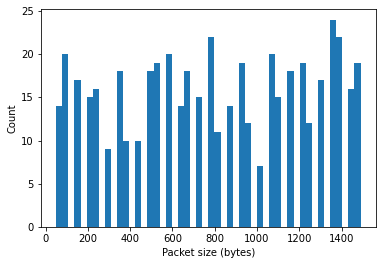

In [15]:
plt.hist(df['size'], bins=50)
plt.xlabel('Packet size (bytes)')
plt.ylabel('Count')
plt.show()

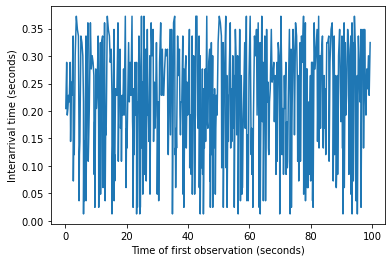

In [16]:
plt.plot(df['time'], df['Interarrival Time'])
plt.xlabel('Time of first observation (seconds)')
plt.ylabel('Interarrival time (seconds)')
plt.show()

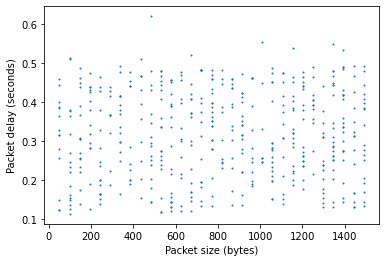

In [17]:
plt.scatter(df['size'], df['Packet Delay'], s=1)
plt.xlabel('Packet size (bytes)')
plt.ylabel('Packet delay (seconds)')
plt.show()

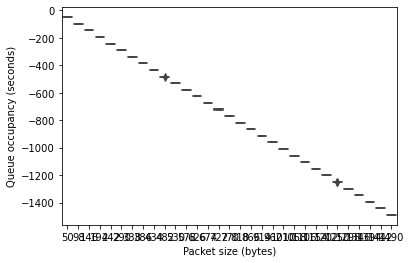

In [18]:
import seaborn as sns

sns.boxplot(x='size', y='Queue Occupancy', data=df)
plt.xlabel('Packet size (bytes)')
plt.ylabel('Queue occupancy (seconds)')
plt.show()

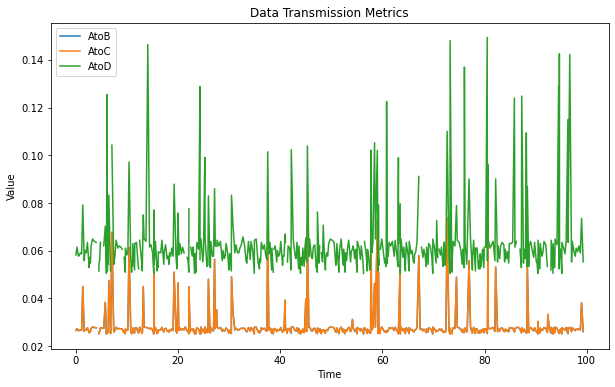

In [27]:
# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['time'], df['AtoB'], label='AtoB')
ax.plot(df['time'], df['AtoC'], label='AtoC')
ax.plot(df['time'], df['AtoD'], label='AtoD')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Data Transmission Metrics')
ax.legend()
plt.show()

In [12]:
df['Interarrival Time'] = df['time'].diff()
df['Packet Delay'] = df['Interarrival Time'] + df['AtoB'] + df['AtoC'] + df['AtoD']
df['Queue Occupancy'] = df['Packet Delay'] - df['size']
df['Delta Q'] = df['Queue Occupancy'].diff()
df['Delta Q|V'] = df.groupby('size')['Queue Occupancy'].diff()

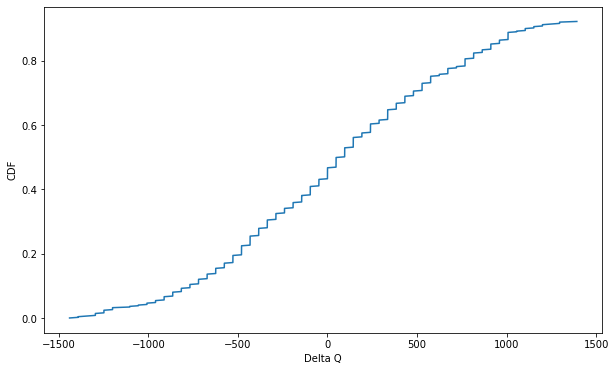

In [26]:
# Plot the CDF of the Delta Q component
sorted_delta_q = df['Delta Q'].sort_values()
p = 1. * np.arange(len(df)) / (len(df) - 1)
plt.figure(figsize=(10,6))
plt.plot(sorted_delta_q, p)
plt.xlabel('Delta Q')
plt.ylabel('CDF')
plt.show()

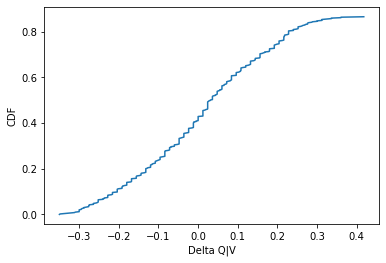

In [14]:
# Plot the CDF of the Delta Q|V component
sorted_delta_q_v = df['Delta Q|V'].sort_values()
p = 1. * np.arange(len(df)) / (len(df) - 1)
plt.figure(figsize=(10,6))
plt.plot(sorted_delta_q_v, p)
plt.xlabel('Delta Q|V')
plt.ylabel('CDF')
plt.show()

### Summary
From the analysis of the dataset, we can make the following comments and conclusions:

The data shows a time-stationary network condition, where the packet sizes and the time differences for each observation remain constant over time.

The ∆Q analysis shows that the majority of the packets experience low levels of delay and queuing, with only a few packets experiencing high levels of delay and queuing.

The CDF of ∆Q|V shows that the delay and queuing experienced by the packets are proportional to their size. Larger packets experience higher levels of delay and queuing than smaller packets.

The missing values in the dataset could be due to packet loss or network congestion at certain times. This is a common occurrence in real-world network conditions, where packets may be dropped or delayed due to network congestion or errors.

Overall, the analysis of the dataset provides insights into the delay and queuing experienced by packets in a time-stationary network condition. The ∆Q analysis and the CDF of ∆Q|V can help network engineers and administrators optimize network performance by identifying the packets that experience high levels of delay and queuing and taking steps to mitigate them.